In [171]:
# 1 라이브러리 임포트

import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn as sk

# 알고리즘을 그래픽화 하기위한 라이브러리
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import rcParams
import re
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Rescaling
import keras

# 모델생성 라이브러리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 스플릿,스케일링
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [172]:
# 1 데이터 불러오기 
path = "../Playground Series Season 3, Episode 3/playground-series-s3e3/"

train_csv = pd.read_csv(path+"train.csv")
test_csv = pd.read_csv(path+"test.csv")

In [173]:
# 2. 데이터 조회해보기
# y 값은 Attriton 이고 바이너리 
train_csv.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [174]:
# 3. 데이터 의 문자열 값 조회
print(np.unique(train_csv.BusinessTravel,return_counts=1),"\n",
np.unique(train_csv.Department,return_counts=1),"\n",
np.unique(train_csv.EducationField,return_counts=1))


(array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object), array([ 126,  261, 1290])) 
 (array(['Human Resources', 'Research & Development', 'Sales'], dtype=object), array([  39, 1167,  471])) 
 (array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object), array([ 13, 775, 152, 549,  82, 106]))


In [175]:
# 4. 데이터의 결측치 확인
train_csv.isna().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [176]:
# 데이터 조사 결과 데이터의 결측치가 없고 문자열케이스만 분리하면 됨

In [177]:
# 5. 데이터 원 핫 인코딩
# 1-1 겟더미로 문자열 제거 
train_csv = pd.get_dummies(train_csv)
test_csv = pd.get_dummies(test_csv)

In [178]:
# train 의 칼럼이 56개로 늘어남 ㄷㄷ
print(train_csv.shape,test_csv.shape)

(1677, 56) (1119, 55)


In [179]:
# 6. x 데이터와 y 데이터 분리
x = train_csv.drop(["Attrition"],axis=1)
y = train_csv.Attrition

print(x.shape,y.shape)


(1677, 55) (1677,)


In [180]:
# 7. train test 스플릿

x_train, x_test, y_train,y_test = train_test_split(
    x,
    y,
    train_size=0.8,
    shuffle = True,
    stratify = y,
    # random_state=21
)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1341, 55) (336, 55)
(1341,) (336,)


In [181]:
# 8. 데이터 스케일링 
scaler = MinMaxScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1341, 55) (336, 55)
(1341,) (336,)


In [182]:
# 9. 모델구성

dr = 0
model = Sequential([
    Dense(256,input_dim=55,activation="relu"),
    Dropout(rate=dr),
    Dense(128,activation="relu"),
    Dropout(rate=dr),
    Dense(64,activation="relu"),
    Dropout(rate=dr),
    Dense(32,activation="relu"),
    Dropout(rate=dr),
    Dense(16,activation="relu"),
    Dropout(rate=dr),
    Dense(8,activation="relu"),
    Dropout(rate=dr),
    Dense(4,activation="relu"),
    Dropout(rate=dr),
    Dense(2,activation="relu"),
    Dropout(rate=dr),
# 이진분할 이기때문에 출력층 1 , sigmoid
    Dense(1,activation="sigmoid")
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 256)               14336     
                                                                 
 dropout_96 (Dropout)        (None, 256)               0         
                                                                 
 dense_109 (Dense)           (None, 128)               32896     
                                                                 
 dropout_97 (Dropout)        (None, 128)               0         
                                                                 
 dense_110 (Dense)           (None, 64)                8256      
                                                                 
 dropout_98 (Dropout)        (None, 64)                0         
                                                                 
 dense_111 (Dense)           (None, 32)              

In [183]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stopping = EarlyStopping(
monitor='val_loss',
min_delta=0.01, patience=10, 
verbose=1, 
mode='min')

plat =ReduceLROnPlateau(
        monitor="val_loss", 
        mode='min', 
        patience=3, 
        factor=0.1, 
        min_lr=1e-8, 
        min_delta=0.000001)

# 이진분할 이기 떄문에 로스 binary_crossentropy
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

# 
hist = model.fit(x_train, y_train, epochs=500, 
                 validation_split=0.2,
                 batch_size=16,
                 verbose=1,
                 callbacks = [early_stopping,plat])


Epoch 1/500
67/67 [==============================] - 1s 5ms/step - loss: 0.3742 - accuracy: 0.8825 - val_loss: 0.3482 - val_accuracy: 0.8736 - lr: 0.0010
Epoch 2/500
67/67 [==============================] - 0s 3ms/step - loss: 0.2998 - accuracy: 0.8825 - val_loss: 0.3248 - val_accuracy: 0.8736 - lr: 0.0010
Epoch 3/500
67/67 [==============================] - 0s 3ms/step - loss: 0.2842 - accuracy: 0.8825 - val_loss: 0.3252 - val_accuracy: 0.8736 - lr: 0.0010
Epoch 4/500
67/67 [==============================] - 0s 3ms/step - loss: 0.2691 - accuracy: 0.8825 - val_loss: 0.3822 - val_accuracy: 0.8736 - lr: 0.0010
Epoch 5/500
67/67 [==============================] - 0s 3ms/step - loss: 0.2723 - accuracy: 0.8825 - val_loss: 0.3232 - val_accuracy: 0.8736 - lr: 0.0010
Epoch 6/500
67/67 [==============================] - 0s 3ms/step - loss: 0.2467 - accuracy: 0.8974 - val_loss: 0.3361 - val_accuracy: 0.8736 - lr: 0.0010
Epoch 7/500
67/67 [==============================] - 0s 3ms/step - loss: 0.2

In [184]:
scores = model.evaluate(x_train, y_train, batch_size=30)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

45/45 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9277
accuracy: 92.77%


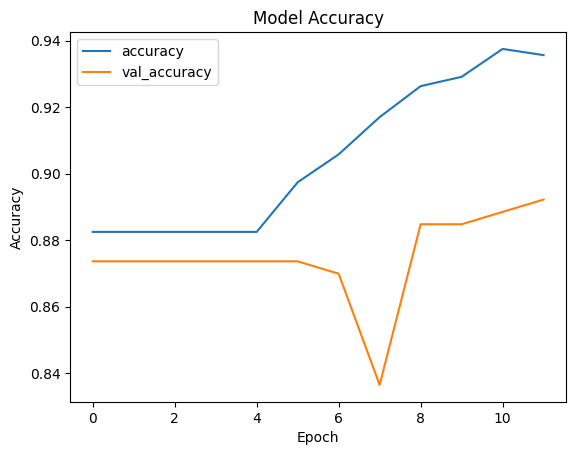

In [185]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["accuracy","val_accuracy"],loc='upper left')
plt.show()

In [186]:
# y_submit = model.predict(test_csv)
# # print(y_submit[:20])

# # 1 과 1로 이진변환해주는 코드
# y_submit =y_submit.flatten()
# # y_predict 가 0.5 보다 크면 1 아니면 0 반환
# y_submit = np.where(y_submit > 0.5, 1 , 0)
# print(y_submit[:20])

# print(len(y_submit))


35/35 [==============================] - 0s 1ms/step
[1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1]
1119


In [187]:
preds =[]

preds.append(model.predict(test_csv))
pred = np.average(np.array(preds),axis=0)

pred

# 15-3 경로와 파일명 지정
submission = pd.read_csv(path +"sample_submission.csv",index_col="id")
submission['Attrition'] = pred
# 임계값을 0 으로 변경
submission['Attrition'] = np.where(submission['Attrition'] > 0.5, 1 , 0)

submission.to_csv(path+"submission_4.csv")

35/35 [==============================] - 0s 2ms/step


,Attrition
id,
1677,1
1678,0
1679,1
1680,0
1681,1
...,...
2791,0
2792,0
2793,0
